# Import important files

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [232]:
# Showing matplotlib plots in jupyter notebook
%matplotlib inline

# Read Data

In [292]:
# Getting Training dataset ( Variant #1 )
# Importing data as Dataframe
df = pd.read_csv('../Dataset/Dataset/Training/Features_Variant_1.csv',sep=',', header=None)

# Importing data as numpy array 
X = np.genfromtxt('../Dataset/Dataset/Training/Features_Variant_1.csv', delimiter=",")

# Functions Section

In [290]:
def matrixToNumber(df):
    
    # Checking df type that whether is Dataframe or not!
    if ( type(df) == pd.core.frame.DataFrame ):
        df_temp = np.ones((df.shape[0],1), dtype='int')

    # Converting df to Dataframe if df is Array or Series
    elif ( type(df) == numpy.ndarray or type(df) == pd.core.frame.Series ):
        df = pd.DataFrame(df)
        df_temp = np.ones((df.shape[0],1), dtype='int')
        
    else:
        return "Function expect Dataframe"
    
    # Making columns labels to start from 0
    df.columns = df.columns - df.columns[0]
        
    # Finding day of week post had published
    for a in df.columns:
        df_temp[df[a] == 1] = int(df.shape[1]) - int(a) - 1
    
    # returning numpy array for easier later uses
    return np.array(df_temp).T[0]

# Drop column with integer label
def drop_int(df, val):
    
    # Checking df type that whether is Dataframe or not!
    if ( type(df) == pd.core.frame.DataFrame ):
        df = df.T.drop(val,axis=0).T
        df.rename(columns=(lambda x: ( x - 1 if x > val else x)),inplace=True)
        
        return df
    else:
        return "Function expect Dataframe"

In [289]:
a = np.ones((12))
type(a)

numpy.ndarray

# Dataset Analysis

In [235]:
# Getting first 5 training data in dataset
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [236]:
# example of numpy "arr" numpy array
X[0]

array([  6.34995000e+05,   0.00000000e+00,   4.63000000e+02,
         1.00000000e+00,   0.00000000e+00,   8.06000000e+02,
         1.12910448e+01,   1.00000000e+00,   7.04951385e+01,
         0.00000000e+00,   8.06000000e+02,   7.57462687e+00,
         0.00000000e+00,   6.94358264e+01,   0.00000000e+00,
         7.60000000e+01,   2.60447761e+00,   0.00000000e+00,
         8.50550187e+00,   0.00000000e+00,   8.06000000e+02,
         1.06492537e+01,   1.00000000e+00,   7.02547876e+01,
        -6.90000000e+01,   8.06000000e+02,   4.97014925e+00,
         0.00000000e+00,   6.98505804e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   6.50000000e+01,   1.66000000e+02,
         2.00000000e+00,   0.00000000e+00,   2.40000000e+01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [237]:
# Disovering more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
0     40949 non-null int64
1     40949 non-null int64
2     40949 non-null int64
3     40949 non-null int64
4     40949 non-null float64
5     40949 non-null float64
6     40949 non-null float64
7     40949 non-null float64
8     40949 non-null float64
9     40949 non-null float64
10    40949 non-null float64
11    40949 non-null float64
12    40949 non-null float64
13    40949 non-null float64
14    40949 non-null float64
15    40949 non-null float64
16    40949 non-null float64
17    40949 non-null float64
18    40949 non-null float64
19    40949 non-null float64
20    40949 non-null float64
21    40949 non-null float64
22    40949 non-null float64
23    40949 non-null float64
24    40949 non-null float64
25    40949 non-null float64
26    40949 non-null float64
27    40949 non-null float64
28    40949 non-null float64
29    40949 non-null int64
30    40949 non-null int64
31  

In [238]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [239]:
# Getting unique values of "H Local" Feature
np.unique(X[:,38])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.])

### Feature Normalize

In [240]:
# Import preprocessing functions in sklearn
from sklearn import preprocessing

# Normalize dataset features
X_norm =  preprocessing.normalize(X[:,:53],axis= 1, copy= True)
X_temp = X.copy()
X_temp[:,0:53] = X_norm
X_temp[:,53] = X[:,53]
X_norm = X_temp

# Converting X_norm to Dataframe
df_norm = pd.DataFrame(X_norm)

In [241]:
# Analysis data after normalization
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,40949.000000,40949.000000,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,4.094900e+04,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,0.983812,0.025267,0.058903,2.217905e-03,0.000008,0.002787,0.000311,0.000179,0.000434,6.565721e-07,...,0.000010,0.000010,0.000010,0.000009,0.000012,0.000013,0.000011,0.000011,0.000010,7.322889
std,0.067383,0.116617,0.081969,1.217793e-02,0.000256,0.008209,0.000954,0.000683,0.001181,7.319091e-05,...,0.000111,0.000118,0.000121,0.000103,0.000192,0.000186,0.000148,0.000144,0.000121,35.494550
min,0.047232,0.000000,0.000000,6.148958e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.994518,0.000000,0.007092,8.974377e-06,0.000000,0.000291,0.000036,0.000009,0.000050,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.999174,0.000000,0.030617,7.406778e-05,0.000000,0.000776,0.000085,0.000038,0.000111,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.999874,0.000198,0.072375,6.367665e-04,0.000000,0.002274,0.000250,0.000126,0.000338,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,0.988438,0.566954,7.053838e-01,0.026099,0.103350,0.026099,0.026099,0.019514,1.304934e-02,...,0.005158,0.006187,0.006187,0.004974,0.021262,0.021482,0.009161,0.011600,0.008462,1305.000000


### Adding Average Of CC2, CC3, CC4 for later use

In [242]:
# We use this column when we want to plot "Average of Total Comments" vs. "Pages Likes" and etc.
temp = np.mean(X_norm[:,31:34],axis=1)

# Inserting new column before target column
X_norm = np.insert(arr=X_norm,obj=53,values=temp, axis=1)

# Converting new created Matrix to dataframe
df_norm = pd.DataFrame(X_norm)

### Plot the data

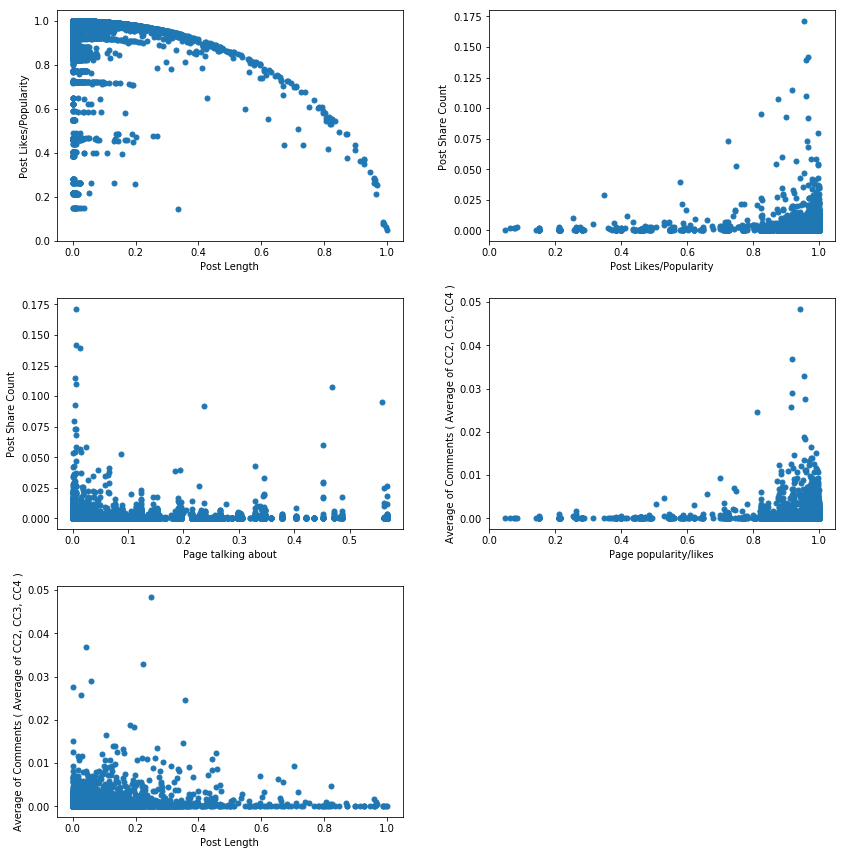

In [329]:
fig = plt.figure()

axes1 = fig.add_axes([0, 2, 0.8, 0.8])
axes2 = fig.add_axes([1,2,0.8,0.8])
axes3 = fig.add_axes([0,1,0.8,0.8])
axes4 = fig.add_axes([1,1,0.8,0.8])
axes5 = fig.add_axes([0,0,0.8,0.8])

# "Pages Likes/Popularity" Vs. "Pages Category"
axes1.plot(X_norm[:,35], X_norm[:,0], marker='o', markersize=5, lw= 0)
axes1.set_xlabel("Post Length")
axes1.set_ylabel("Post Likes/Popularity")

# =====> We can conclude when posts become very long, popularity of the posts decrease !!!!

# "Page popularity/Likes" vs. "Share Counts"
axes2.plot(X_norm[:,0], X_norm[:,36], marker='o', markersize=5, lw= 0)
axes2.set_xlabel("Post Likes/Popularity")
axes2.set_ylabel("Post Share Count ")

# ======> We can conclude when posts populartiy increases, the amounts of share increases too.

# "Page talking about" vs. "Share Counts"
axes3.plot(X_norm[:,2], X_norm[:,36], marker='o', markersize=5, lw= 0)
axes3.set_xlabel("Page talking about")
axes3.set_ylabel("Post Share Count")

# ======> There is no good relation that make sense

# "Average of Comments ( Average of CC2, CC3, CC4 )" vs. "Page popularity/likes"
axes4.plot(X_norm[:,0],X_norm[:,53], marker='o', markersize=5, lw= 0)
axes4.set_xlabel("Page popularity/likes")
axes4.set_ylabel("Average of Comments ( Average of CC2, CC3, CC4 )")

# ======> We can conclude that when post popularity increase, the amounts of the comments increase too.

# "Average of Comments ( Average of CC2, CC3, CC4 )" vs. "Page popularity/likes"
axes5.plot(X_norm[:,35],X_norm[:,53], marker='o', markersize=5, lw= 0)
axes5.set_xlabel("Post Length")
axes5.set_ylabel("Average of Comments ( Average of CC2, CC3, CC4 )")

# ======> We can conclude when posts become very long, average numbers of the comments decrease !!!!


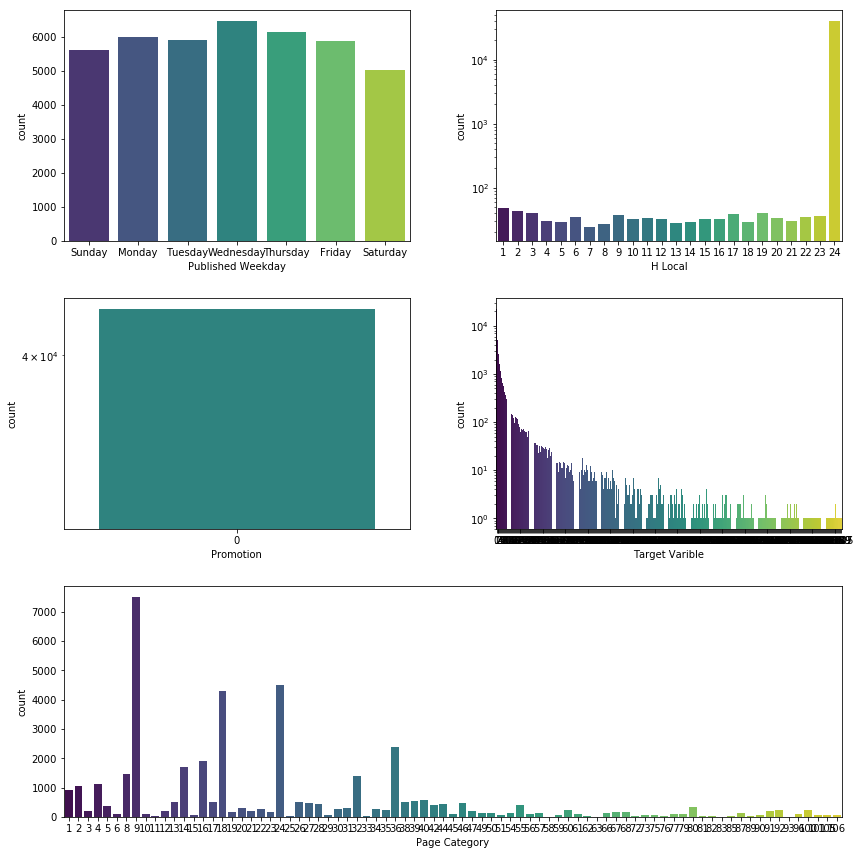

In [327]:
fig = plt.figure()

axes1 = fig.add_axes([0, 2, 0.8, 0.8])
axes2 = fig.add_axes([1,2,0.8,0.8])
axes3 = fig.add_axes([0,1,0.8,0.8])
axes4 = fig.add_axes([1,1,0.8,0.8])
axes5 = fig.add_axes([0,0,1.8,0.8])

# Before Plotting the data, we should convert all of the columns relates to "Post Published Weekday" to pd.Series
weekday = matrixToNumber(df.T[39:46].T)

# plot "Post published weekday" Countplot
sns.countplot(weekday ,palette='viridis', ax= axes1)
axes1.set_xlabel("Published Weekday")
axes1.set_xticklabels(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

# plot "H local" Countplot
axes2.set_yscale("log")
sns.countplot(df[38] ,palette= 'viridis', ax= axes2)
axes2.set_xlabel("H Local")

# =====> We can see that majority of posts published at 24 H Local and Wednesday

# Plot "Promotion" Countplot
axes3.set_yscale("log")
sns.countplot(df[37] ,palette= 'viridis', ax= axes3)
axes3.set_xlabel("Promotion")

# =====> We can see that all of the posts promotion status is 0, So This column has no effect on our predections
# =====> So we can ignore this column

# Plot "Target Variable" Countplot
sns.countplot(df[53], palette= 'viridis', ax= axes4)
axes4.set_yscale("log")
axes4.set_xlabel("Target Varible")

# =====> We can conclude when posts become very long, popularity of the post decrease !!!!

# Plot "Category" Countplot
sns.countplot(df[3] ,palette= 'viridis', ax= axes5)
axes5.set_xlabel("Page Category")

# ======> We can see 9, 18 and 36 categorie's have occupied majority of posts

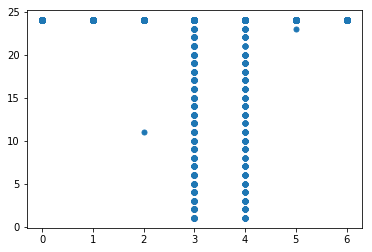

In [311]:
# "Post published weekday" vs. "H local"
# Before Plotting the data, we should convert all of the columns relates to "Post Published Weekday" to pd.Series
plt.plot(weekday,df[38], marker='o', markersize=5, lw= 0)

In [328]:
## keshidane unhayi ke dirooz moshkel dar meghyas dashtam
df[53].value_counts()

0       22579
1        5194
2        2624
3        1583
4        1171
5         836
6         636
7         564
8         414
9         374
10        307
11        300
13        235
12        234
15        220
14        184
16        147
17        143
20        126
21        123
18        120
22        116
19         98
23         93
24         78
28         72
26         72
27         69
33         65
29         65
        ...  
298         1
202         1
745         1
208         1
511         1
756         1
434         1
564         1
372         1
308         1
244         1
212         1
1139        1
243         1
211         1
179         1
498         1
338         1
368         1
306         1
178         1
146         1
753         1
465         1
369         1
209         1
145         1
720         1
496         1
336         1
Name: 53, Length: 361, dtype: int64